<a href="https://colab.research.google.com/github/rahulhnagaraj/Model-Evaluation/blob/main/Analyzing_Diabetes_Prediction_with_Logistic_Regression%2C_SVM_Models_%26_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os

# Path to your uploaded ZIP file
zip_path = "/content/archive (1).zip"  # Adjusted to match your file name
extract_path = "/content/drive/MyDrive/Diabetes_Readmission"  # Save in Google Drive

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List the files to confirm extraction
os.listdir(extract_path)


['description.pdf', 'diabetic_data.csv']

In [ ]:
import pandas as pd

# Path to the CSV file
file_path = "/content/drive/MyDrive/Diabetes_Readmission/diabetic_data.csv"

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()

,0
encounter_id,0
patient_nbr,0
race,0
gender,0
age,0
weight,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0


In [ ]:
print(df.columns)


Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [ ]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [ ]:
# Step 1: Check Missing Values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

# Step 2: Drop Columns with Excessive Missing Data (if necessary)
# Here, we define excessive as more than 40% missing
threshold = 0.4 * len(df)
columns_to_drop = missing_values[missing_values > threshold].index
df = df.drop(columns=columns_to_drop, axis=1)
print(f"Dropped columns: {columns_to_drop}")

# Step 3: Inspect Remaining Data
print("Shape after dropping columns:", df.shape)

# Optional: Save the cleaned dataset for further steps
cleaned_file_path = '/content/cleaned_diabetic_data.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved at: {cleaned_file_path}")


Missing Values:
 max_glu_serum    96420
A1Cresult        84748
dtype: int64
Dropped columns: Index(['max_glu_serum', 'A1Cresult'], dtype='object')
Shape after dropping columns: (101766, 48)
Cleaned dataset saved at: /content/cleaned_diabetic_data.csv


In [ ]:
# Step 1: View basic information about the dataset
print(df.info())

# Step 2: Display summary statistics for numerical columns
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

Unique values in race: ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
Unique values in gender: ['Female' 'Male' 'Unknown/Invalid']
Unique values in age: ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
Unique values in weight: ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
Unique values in payer_code: ['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM']
Unique values in medical_specialty: ['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology']
Unique values in diag_1: ['250.83' '276' '648' '8' '197' '414' '428' '398' '434' '250.7']
Unique values in diag_2: ['?' '250.01' '250' '250.43' '157' '411' '492' '427' '198' '403']
Unique values in diag_3: ['?' '255' 'V27' '403' '250' 'V45' '38' '486' '996' '197']
Unique values in metformin: ['

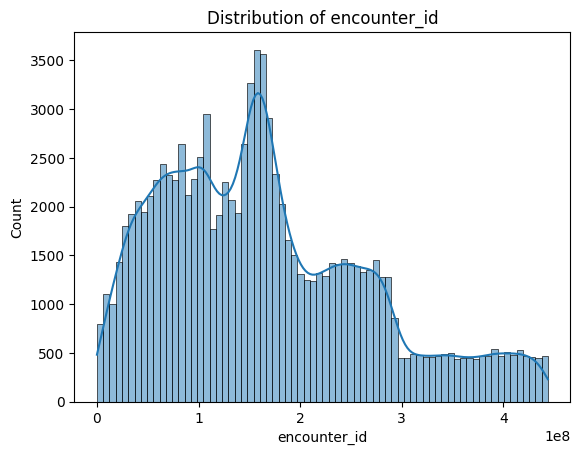

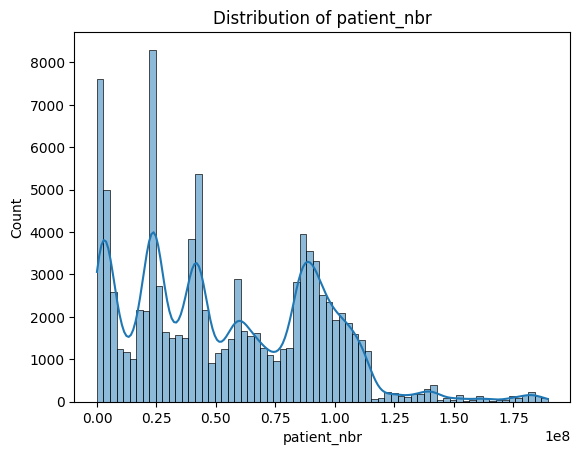

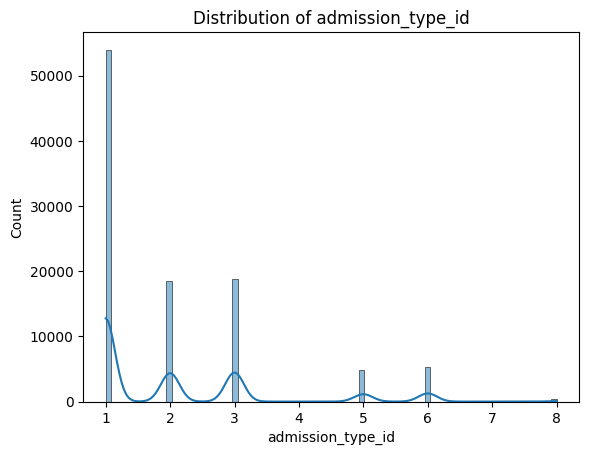

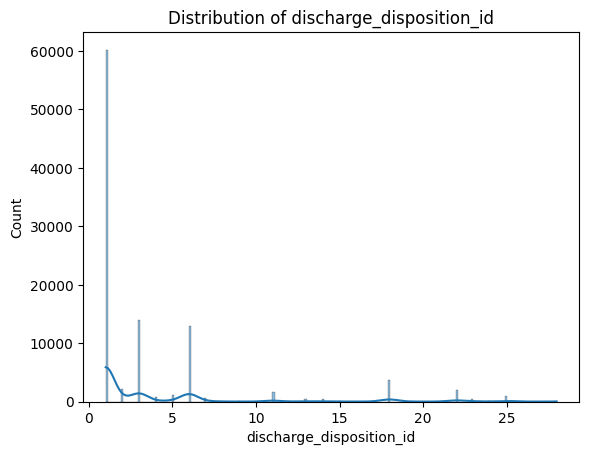

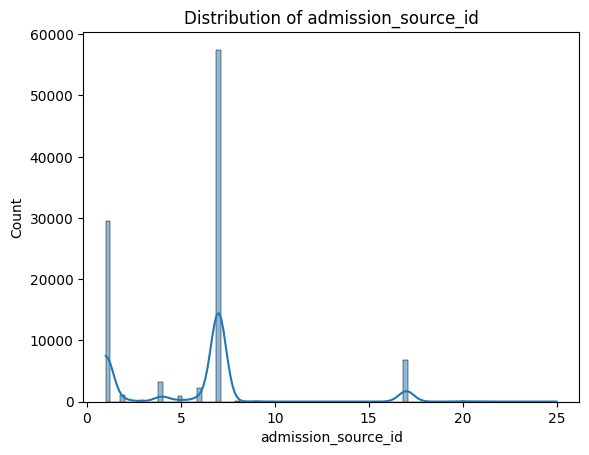

In [ ]:
# Check unique values for categorical columns
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].unique()[:10]}")  # Display first 10 unique values

# Plot distribution of numerical features
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns[:5]:  # Visualize the first 5 numerical columns
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


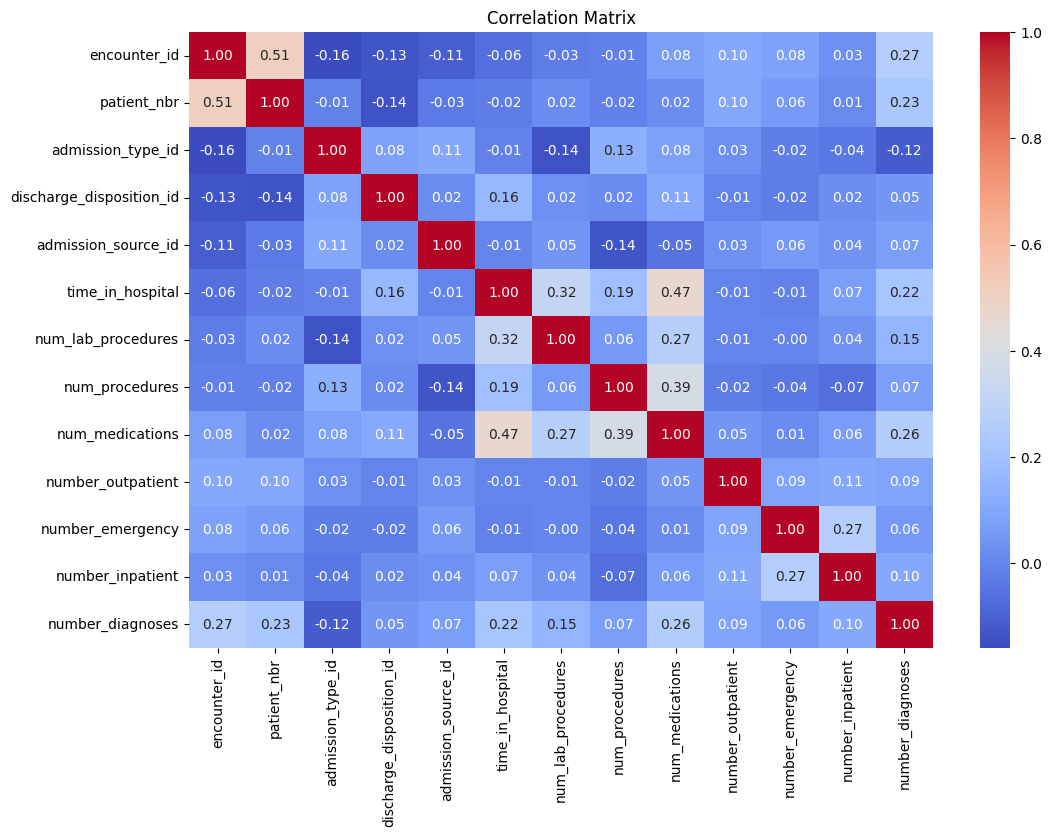

In [ ]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


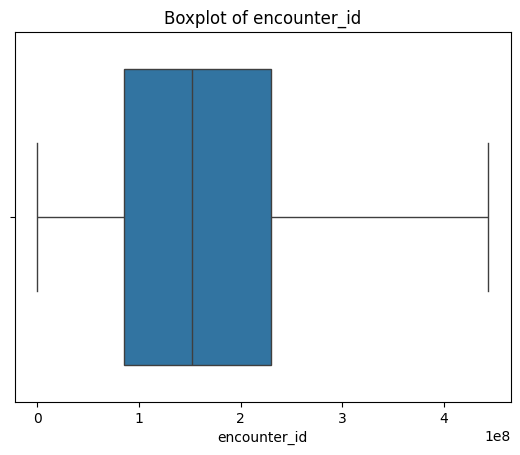

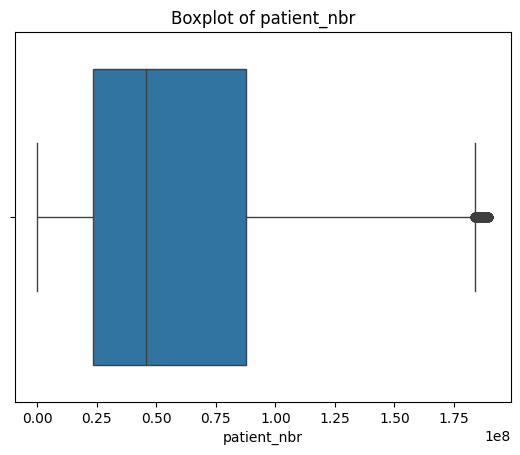

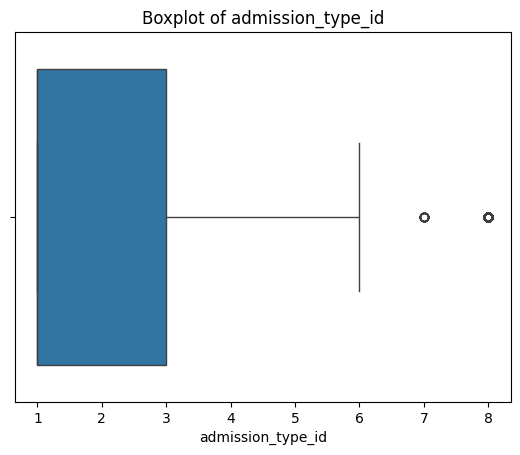

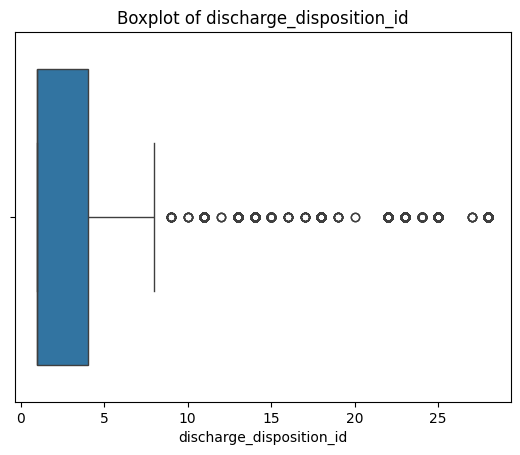

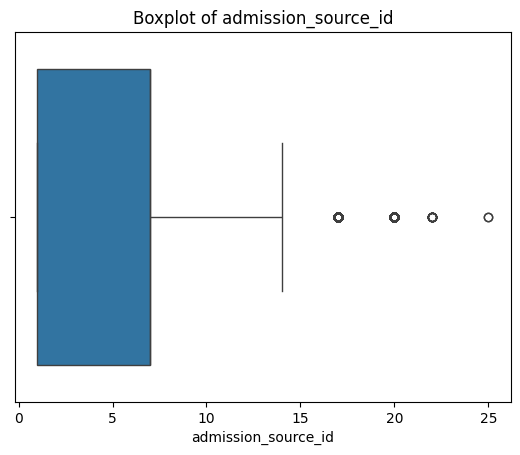

In [ ]:
# Plot boxplots for numerical features
for col in numerical_columns[:5]:  # First 5 numerical columns
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [ ]:
# Check the unique values in the 'readmitted' column to understand its format
print(df['readmitted'].unique())

# Combine readmission columns into a single target variable
df['readmission'] = df['readmitted'].apply(lambda x: 'NO' if x == 'NO' else '>30')
df = df.drop(['readmitted'], axis=1)  # Drop the original 'readmitted' column

# Check the result
print(df['readmission'].value_counts())


['NO' '>30' '<30']
readmission
NO     54864
>30    46902
Name: count, dtype: int64


<ipython-input-155-25c2288ecc57>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='readmission', data=df, palette='viridis')


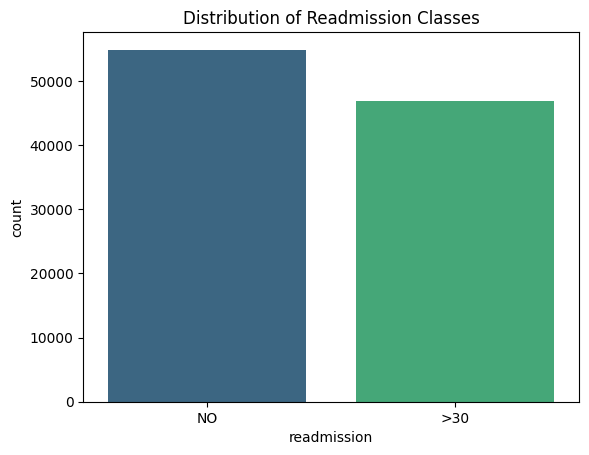

In [ ]:
# Visualize the distribution of the target variable
sns.countplot(x='readmission', data=df, palette='viridis')
plt.title("Distribution of Readmission Classes")
plt.show()


<ipython-input-156-338c4e9330e8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='readmission', y='time_in_hospital', data=df, palette='coolwarm')


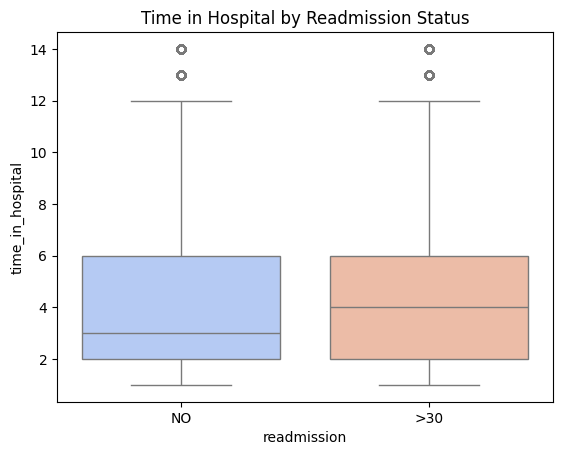

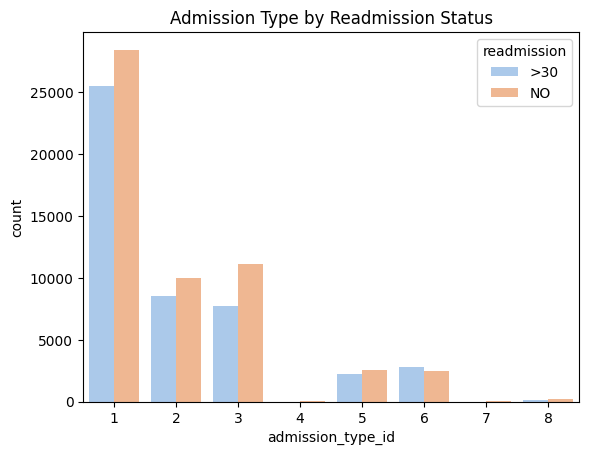

In [ ]:
# Example: Boxplot for time_in_hospital
sns.boxplot(x='readmission', y='time_in_hospital', data=df, palette='coolwarm')
plt.title("Time in Hospital by Readmission Status")
plt.show()

# Example: Countplot for admission_type_id
sns.countplot(x='admission_type_id', hue='readmission', data=df, palette='pastel')
plt.title("Admission Type by Readmission Status")
plt.show()


In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)



['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmission']


In [ ]:
# One-hot encoding for categorical columns
# Ensure 'readmitted' is not in the list of categorical columns
categorical_columns = [col for col in df.select_dtypes(include=['object']).columns.tolist() if col != 'readmitted']

# Now perform one-hot encoding for remaining categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
print("Shape after encoding:", df_encoded.shape)



Shape after encoding: (101766, 2431)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])
print("Scaled numerical features:")
print(df_encoded[numerical_columns].head())


Scaled numerical features:
   encounter_id  patient_nbr  admission_type_id  discharge_disposition_id  \
0     -1.587330    -1.191545           2.750800                  4.031022   
1     -1.608075     0.033564          -0.708461                 -0.514312   
2     -1.608901     0.819654          -0.708461                 -0.514312   
3     -1.604653     0.726480          -0.708461                 -0.514312   
4     -1.609366    -0.305227          -0.708461                 -0.514312   

   admission_source_id  time_in_hospital  num_lab_procedures  num_procedures  \
0            -1.169873         -1.137649           -0.106517       -0.785398   
1             0.306482         -0.467653            0.808384       -0.785398   
2             0.306482         -0.802651           -1.631351        2.145781   
3             0.306482         -0.802651            0.045967       -0.199162   
4             0.306482         -1.137649            0.401761       -0.785398   

   num_medications  number_ou

In [ ]:
print(df_encoded.columns)


Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient',
       ...
       'glyburide-metformin_No', 'glyburide-metformin_Steady',
       'glyburide-metformin_Up', 'glipizide-metformin_Steady',
       'glimepiride-pioglitazone_Steady', 'metformin-rosiglitazone_Steady',
       'metformin-pioglitazone_Steady', 'change_No', 'diabetesMed_Yes',
       'readmission_NO'],
      dtype='object', length=2431)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         >30       0.69      0.81      0.74        36
          NO       0.61      0.46      0.52        24

    accuracy                           0.67        60
   macro avg       0.65      0.63      0.63        60
weighted avg       0.66      0.67      0.66        60

Confusion Matrix:
 [[29  7]
 [13 11]]


In [ ]:
from imblearn.over_sampling import SMOTE

# Oversample the minority class
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Class distribution after SMOTE:")
print(pd.Series(y_train_sm).value_counts())


Class distribution after SMOTE:
readmission
>30    139
NO     139
Name: count, dtype: int64


In [ ]:
# Train a logistic regression model on the balanced dataset
model_sm = LogisticRegression()
model_sm.fit(X_train_sm, y_train_sm)

# Evaluate the model on the test set
y_pred_sm = model_sm.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred_sm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sm))


Classification Report:
               precision    recall  f1-score   support

         >30       0.69      0.75      0.72        36
          NO       0.57      0.50      0.53        24

    accuracy                           0.65        60
   macro avg       0.63      0.62      0.63        60
weighted avg       0.64      0.65      0.65        60

Confusion Matrix:
 [[27  9]
 [12 12]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_sm, y_train_sm)

# Evaluate the model
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

         >30       0.65      0.86      0.74        36
          NO       0.58      0.29      0.39        24

    accuracy                           0.63        60
   macro avg       0.61      0.58      0.56        60
weighted avg       0.62      0.63      0.60        60



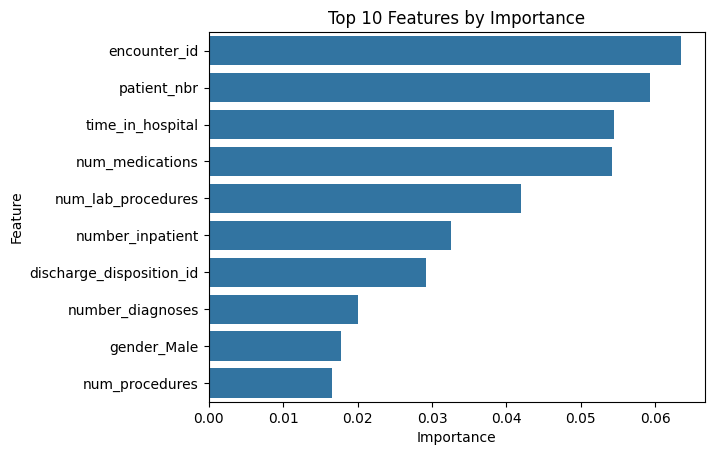

In [ ]:
# Feature importance for Random Forest
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title("Top 10 Features by Importance")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Initialize the Random Forest model with default hyperparameters
rf_model = RandomForestClassifier(random_state=42)

# Step 2: Train the model on the balanced dataset
rf_model.fit(X_train_sm, y_train_sm)

# Step 3: Predict on the test set
y_pred = rf_model.predict(X_test)

# Step 4: Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[31  5]
 [17  7]]

Classification Report:
               precision    recall  f1-score   support

         >30       0.65      0.86      0.74        36
          NO       0.58      0.29      0.39        24

    accuracy                           0.63        60
   macro avg       0.61      0.58      0.56        60
weighted avg       0.62      0.63      0.60        60



In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train_sm, y_train_sm, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-Validation Scores: [0.66071429 0.64285714 0.67857143 0.8        0.85454545]
Mean CV Score: 0.7273376623376624


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score  # Import accuracy_score

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_sm, y_train_sm)
lr_pred = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))

# Support Vector Machine
svm_model = SVC(random_state=42)
svm_model.fit(X_train_sm, y_train_sm)
svm_pred = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))


Logistic Regression Accuracy: 0.65
SVM Accuracy: 0.7


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Logistic Regression Metrics
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_pred))

# SVM Metrics
print("SVM Classification Report:\n", classification_report(y_test, svm_pred))

# Calculate and print ROC-AUC for both models
lr_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])  # Logistic Regression AUC
print("Logistic Regression ROC-AUC:", lr_auc)

# For SVM, enable probability estimation
svm_model_prob = SVC(random_state=42, probability=True)
svm_model_prob.fit(X_train_sm, y_train_sm)
svm_pred_prob = svm_model_prob.predict_proba(X_test)[:, 1]
svm_auc = roc_auc_score(y_test, svm_pred_prob)  # SVM AUC
print("SVM ROC-AUC:", svm_auc)


Logistic Regression Classification Report:
               precision    recall  f1-score   support

         >30       0.69      0.75      0.72        36
          NO       0.57      0.50      0.53        24

    accuracy                           0.65        60
   macro avg       0.63      0.62      0.63        60
weighted avg       0.64      0.65      0.65        60

SVM Classification Report:
               precision    recall  f1-score   support

         >30       0.70      0.89      0.78        36
          NO       0.71      0.42      0.53        24

    accuracy                           0.70        60
   macro avg       0.70      0.65      0.65        60
weighted avg       0.70      0.70      0.68        60

Logistic Regression ROC-AUC: 0.650462962962963
SVM ROC-AUC: 0.6898148148148149


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Logistic Regression Metrics
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_pred))

# SVM Metrics
print("SVM Classification Report:\n", classification_report(y_test, svm_pred))

# Calculate and print ROC-AUC for both models
lr_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])  # Logistic Regression AUC
print("Logistic Regression ROC-AUC:", lr_auc)

# For SVM, enable probability estimation
svm_model_prob = SVC(random_state=42, probability=True)
svm_model_prob.fit(X_train_sm, y_train_sm)
svm_pred_prob = svm_model_prob.predict_proba(X_test)[:, 1]
svm_auc = roc_auc_score(y_test, svm_pred_prob)  # SVM AUC
print("SVM ROC-AUC:", svm_auc)


Logistic Regression Classification Report:
               precision    recall  f1-score   support

         >30       0.69      0.75      0.72        36
          NO       0.57      0.50      0.53        24

    accuracy                           0.65        60
   macro avg       0.63      0.62      0.63        60
weighted avg       0.64      0.65      0.65        60

SVM Classification Report:
               precision    recall  f1-score   support

         >30       0.70      0.89      0.78        36
          NO       0.71      0.42      0.53        24

    accuracy                           0.70        60
   macro avg       0.70      0.65      0.65        60
weighted avg       0.70      0.70      0.68        60

Logistic Regression ROC-AUC: 0.650462962962963
SVM ROC-AUC: 0.6898148148148149


In [ ]:
lr_model.fit(X_train_sm, y_train_sm)


LogisticRegression(random_state=42)

In [ ]:
lr_pred = lr_model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", accuracy)


Logistic Regression Accuracy: 0.65


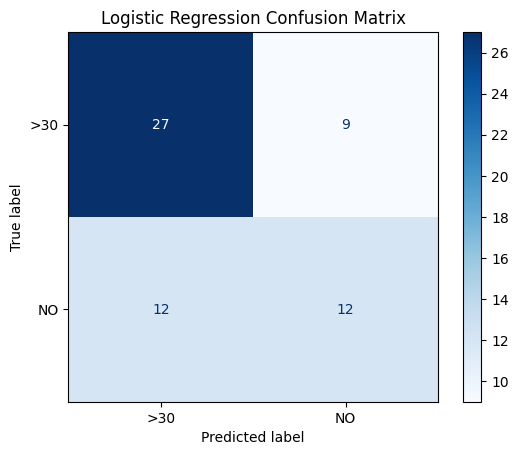

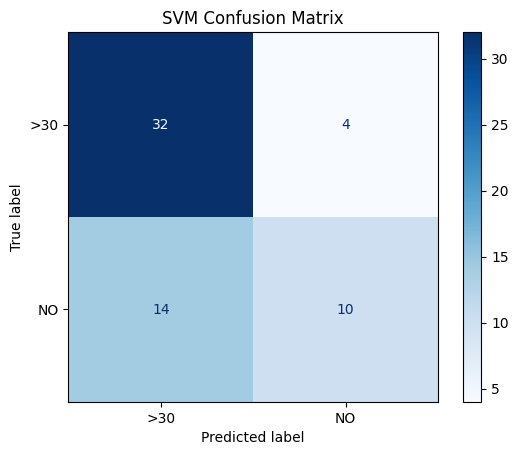

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(lr_model, X_test, y_test, cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


# Predict using the SVM model
svm_pred = svm_model.predict(X_test)

# Calculate the confusion matrix for SVM
svm_conf_matrix = confusion_matrix(y_test, svm_pred)

# Display the confusion matrix for SVM
ConfusionMatrixDisplay(confusion_matrix=svm_conf_matrix, display_labels=label_encoder.classes_).plot(cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.show()



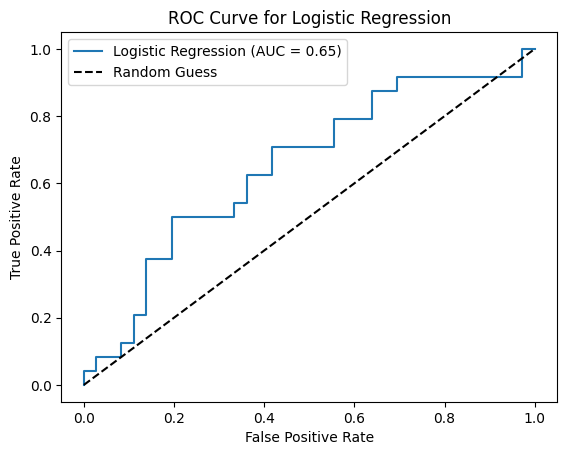

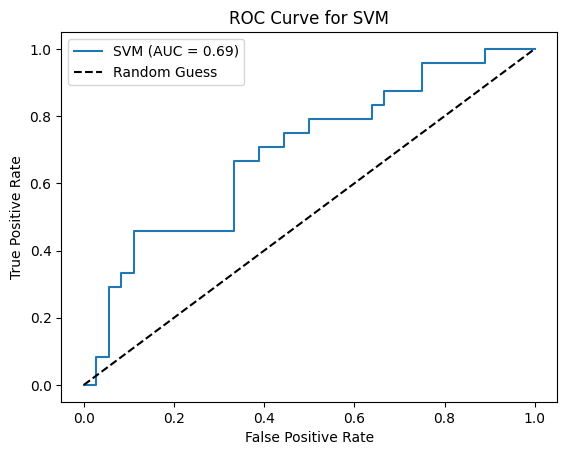

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Encode y_test labels
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)  # Encoding y_test

# Calculate ROC curve for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test_encoded, lr_model.predict_proba(X_test)[:, 1])
lr_auc = auc(fpr_lr, tpr_lr)

# Plot the ROC curve
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression (AUC = {:.2f})".format(lr_auc))
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend()
plt.show()

# Initialize SVM model with probability=True to enable predict_proba
svm_model = SVC(random_state=42, probability=True)

# Train the SVM model
svm_model.fit(X_train_sm, y_train_sm)

# Calculate ROC curve for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test_encoded, svm_model.predict_proba(X_test)[:, 1])
svm_auc = auc(fpr_svm, tpr_svm)

# Plot the ROC curve for SVM
plt.plot(fpr_svm, tpr_svm, label="SVM (AUC = {:.2f})".format(svm_auc))
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVM")
plt.legend()
plt.show()